In [25]:
import sys
import pandas as pd
import sklearn
import numpy as np
import keras
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.pipeline import Pipeline
import numpy as np

In [26]:
# import the dataset
file = 'Autism-Child-Data.txt'

# read the csv
data = pd.read_table(file, sep = ',', index_col = None)

In [27]:
print(data.loc[0])

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      0
A5_Score                      1
A6_Score                      1
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     0
age                           6
gender                        m
ethnicity                Others
jundice                      no
austim                       no
contry_of_res            Jordan
used_app_before              no
result                        5
age_desc           '4-11 years'
relation                 Parent
Class                        NO
Name: 0, dtype: object


In [105]:
data.shape

(292, 21)

In [28]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,1,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
8,1,1,1,1,1,1,1,0,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
9,0,0,1,1,1,0,1,1,0,0,...,f,?,no,yes,Austria,no,5,'4-11 years',?,NO


In [29]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [30]:
data.replace('?', np.nan, inplace=True)

In [31]:
categorical_columns = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Convert target variable to numerical format
label_encoder = LabelEncoder()
data_encoded['Class'] = label_encoder.fit_transform(data_encoded['Class'])

# Split data into features (X) and target (Y)
X = data_encoded.drop(columns=['Class'])  # Features
Y = data_encoded['Class']  # Target variable


In [32]:
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result',
       'gender_m', 'ethnicity_'South Asian'', 'ethnicity_Asian',
       'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_yes', 'austim_yes',
       'contry_of_res_'Isle of Man'', 'contry_of_res_'New Zealand'',
       'contry_of_res_'Saudi Arabia'', 'contry_of_res_'South Africa'',
       'contry_of_res_'South Korea'', 'contry_of_res_'U.S. Outlying Islands'',
       'contry_of_res_'United Arab Emirates'',
       'contry_of_res_'United Kingdom'', 'contry_of_res_'United States'',
       'contry_of_res_Afghanistan', 'contry_of_res_Argentina',
       'contry_of_res_Armenia', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Bahrain',
       'contry_of_res_Bangladesh', 'contry_of_res_Bhutan',
   

In [33]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class, Length: 292, dtype: int32

In [34]:
X.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,used_app_before_yes,relation_Parent,relation_Relative,relation_Self,relation_self
0,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,1,0,0,0,1,1,1,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,1,0,0,1,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False
5,0,0,1,0,1,1,0,1,0,1,...,False,False,False,False,False,False,False,False,False,False
6,1,0,1,1,1,1,0,1,0,1,...,False,False,False,False,False,False,True,False,False,False
7,1,1,1,1,1,1,1,1,0,0,...,False,False,False,False,False,False,True,False,False,False
8,1,1,1,1,1,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
9,0,0,1,1,1,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'result', 'gender_m', "ethnicity_'South Asian'", 'ethnicity_Asian',
       'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_yes', 'austim_yes',
       "contry_of_res_'Isle of Man'", "contry_of_res_'New Zealand'",
       "contry_of_res_'Saudi Arabia'", "contry_of_res_'South Africa'",
       "contry_of_res_'South Korea'",
       "contry_of_res_'U.S. Outlying Islands'",
       "contry_of_res_'United Arab Emirates'",
       "contry_of_res_'United Kingdom'", "contry_of_res_'United States'",
       'contry_of_res_Afghanistan', 'contry_of_res_Argentina',
       'contry_of_res_Armenia', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Bahrain',
       'contry_of_res_Bangladesh', 'contry_of_res_Bhuta

In [36]:
# print an example patient from the categorical data
X.loc[1]

A1_Score                   1
A2_Score                   1
A3_Score                   0
A4_Score                   0
A5_Score                   1
                       ...  
used_app_before_yes    False
relation_Parent         True
relation_Relative      False
relation_Self          False
relation_self          False
Name: 1, Length: 80, dtype: object

In [37]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Sweden,contry_of_res_Syria,contry_of_res_Turkey,used_app_before_yes,relation_Parent,relation_Relative,relation_Self,relation_self
0,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
1,1,1,0,0,1,1,0,1,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,1,0,0,0,1,1,1,0,0,...,False,False,False,False,False,True,False,False,False,False
3,0,1,0,0,1,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False


In [38]:
asd_raw = data['Class']

In [39]:
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

In [40]:
asd_classes.head()

0    0
1    0
2    0
3    0
4    1
Name: Class, dtype: int64

In [41]:
#Y = asd_classes
Y

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class, Length: 292, dtype: int32

In [42]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [43]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_imputed = imputer.fit_transform(X)

In [44]:
X_train_imputed.shape

(233, 80)

In [45]:
X_imputed

array([[1, 1, 0, ..., False, False, False],
       [1, 1, 0, ..., False, False, False],
       [1, 1, 0, ..., False, False, False],
       ...,
       [1, 0, 1, ..., False, False, False],
       [1, 1, 1, ..., False, False, False],
       [0, 0, 1, ..., False, False, False]], dtype=object)

In [46]:
dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the imputed training set
dectree.fit(X_train_imputed, Y_train)

DecisionTreeClassifier(random_state=1)

In [47]:
# Predict using the trained classifier
predictions = dectree.predict(X_test_imputed)

In [48]:
accuracy = accuracy_score(Y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [49]:
y_pred_class = dectree.predict(X_test)
y_pred_class 

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [50]:
print('True:', Y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0]
False: [1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0]


In [51]:
from sklearn import metrics



confusion = metrics.confusion_matrix(Y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[25  0]
 [ 0 34]]


In [52]:
print((TP + TN) / float(TP + TN + FP + FN))

1.0


In [53]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(Y_test, y_pred_class))

1.0
1.0


In [54]:
specificity = TN / (TN + FP)

print(specificity)

1.0


In [55]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)

0.0


In [56]:
print(metrics.precision_score(Y_test, y_pred_class))

1.0


In [57]:
dectree.predict(X_test)[0:10]

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [58]:
y_pred_prob = dectree.predict_proba(X_test)[:, 1]
y_pred_prob

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0.])

In [59]:
dectree.predict_proba(X_test)[0:10]

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [60]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

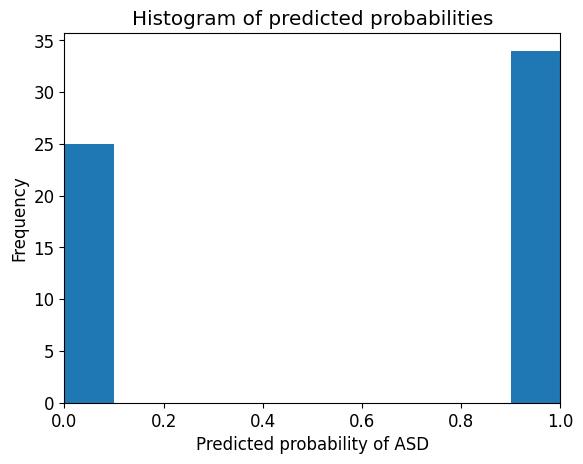

In [61]:
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

In [62]:
dectree.score(X_test, Y_test)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


1.0

In [63]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, X_imputed, Y, cv=10)

cv_scores.mean()

1.0

In [64]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, X_imputed, Y, cv=10)
cv_scores.mean()

0.9482758620689656

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(ranfor, X_imputed, Y, cv=10, scoring='roc_auc').mean()

0.9883333333333333

In [66]:
ranfor.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test_imputed)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.9770114942528735

In [67]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [68]:
cv_scores = cross_val_score(svc, X_imputed, Y, cv=10)

cv_scores.mean()

1.0

In [69]:

cross_val_score(svc,X_imputed, Y, cv=10, scoring='roc_auc').mean()

1.0

In [70]:
svc.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


1.0

In [71]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, X_imputed, Y, cv=10)

cv_scores.mean()

0.9863218390804598

In [72]:
cross_val_score(knn, X_imputed, Y, cv=10, scoring='roc_auc').mean()

0.9990476190476191

In [73]:
knn.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test_imputed)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.9770114942528735

In [74]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X_imputed, Y, cv=10)
    print (n, cv_scores.mean())

10 0.9863218390804598
11 0.9828735632183909
12 0.9828735632183909
13 0.9828735632183909
14 0.9863218390804598
15 0.9863218390804598
16 0.9863218390804598
17 0.9794252873563218
18 0.9863218390804598
19 0.9863218390804598
20 0.993103448275862
21 0.9827586206896551
22 0.9965517241379309
23 0.9896551724137932
24 0.993103448275862
25 0.9896551724137932
26 1.0
27 0.9965517241379309
28 0.9965517241379309
29 0.993103448275862
30 0.9965517241379309
31 0.9965517241379309
32 0.993103448275862
33 0.993103448275862
34 0.9965517241379309
35 0.993103448275862
36 0.9965517241379309
37 0.993103448275862
38 0.9965517241379309
39 0.9965517241379309
40 0.9965517241379309
41 0.993103448275862
42 0.9965517241379309
43 0.993103448275862
44 0.9965517241379309
45 0.993103448275862
46 0.993103448275862
47 0.993103448275862
48 0.9965517241379309
49 0.9965517241379309


In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
nb = MultinomialNB()
cv_scores = cross_val_score(nb, X_imputed, Y, cv=10)

cv_scores.mean()

0.8078160919540232

In [77]:
cross_val_score(nb, X_imputed,Y, cv=10, scoring='roc_auc').mean()

0.8941190476190476

In [78]:
nb.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test_imputed)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.8516483516483517

In [79]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, X_imputed,Y, cv=10)
cv_scores.mean()

1.0

In [80]:

cv_scores_roc = cross_val_score(logreg, X_imputed,Y ,cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

In [81]:
logreg.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


1.0

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, X_imputed,Y, cv=10)
cv_scores.mean()

0.9073563218390804

In [83]:
cv_scores_roc = cross_val_score(lda, X_imputed,Y, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9613095238095237

In [84]:
lda.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


0.963855421686747

In [85]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda,X_imputed,Y, cv=10)
cv_scores.mean()

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

0.6778160919540229

In [86]:
cv_scores_roc = cross_val_score(qda, X_imputed,Y, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

0.7341904761904761

In [87]:
qda.fit(X_train_imputed, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but QuadraticDiscriminantAnalysis was fitted without feature names
  warnings.warn(


0.7792207792207791

In [88]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [89]:
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)

In [90]:
clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train_imputed, Y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train_imputed, Y_train)).predict(X_test_imputed)
best_predictions = best_clf.predict(X_test)

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [91]:
best_clf

SVC(C=1, degree=1, kernel='linear', random_state=1)

In [92]:
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(Y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(Y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


In [93]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train_imputed, Y_train)
importances = model.feature_importances_
print(importances)



[-2.58910671e-18  2.73998913e-16  0.00000000e+00  1.55212483e-16
  1.42534788e-16 -1.42847267e-18  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.60167498e-16  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.50346748e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.44670584e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [94]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=0)
model.fit(X_train_imputed, Y_train)

AdaBoostClassifier(random_state=0)

In [95]:
importances = model.feature_importances_
importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.pipeline import Pipeline
import numpy as np

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=1),
    "SVM": SVC(kernel='linear', C=1.0, gamma=2),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}

# Define a custom scoring function for fbeta_score
scoring = make_scorer(fbeta_score, beta=0.5)

# Create an empty list to store pipelines
pipelines = []

# Iterate through each classifier
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")


Evaluating Decision Tree
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[25  0]
 [ 0 34]]
===
Evaluating Random Forest
Cross-validated Fbeta Score: 0.9511589979331914
Cross-validated ROC AUC Score: 0.9883333333333333
Fbeta Score on Test Set: 0.9770114942528735
[[24  1]
 [ 0 34]]
===
Evaluating SVM
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[25  0]
 [ 0 34]]
===
Evaluating KNN
Cross-validated Fbeta Score: 0.9826107465347972
Cross-validated ROC AUC Score: 0.9990476190476191
Fbeta Score on Test Set: 0.9770114942528735
[[24  1]
 [ 0 34]]
===
Evaluating Multinomial Naive Bayes
Cross-validated Fbeta Score: 0.7902765241166901
Cross-validated ROC AUC Score: 0.8941190476190476
Fbeta Score on Test Set: 0.8791208791208792
[[20  5]
 [ 2 32]]
===
Evaluating Logistic Regression
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[25  0]
 [ 0 34]]
===

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[25  0]
 [ 0 34]]
===
Evaluating AdaBoost
Cross-validated Fbeta Score: 1.0
Cross-validated ROC AUC Score: 1.0
Fbeta Score on Test Set: 1.0
[[25  0]
 [ 0 34]]
===


In [98]:
predictions_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [99]:
import joblib

# Save the trained model
model_filename = 'autism_model.joblib'
joblib.dump(classifiers, model_filename)


['autism_model.joblib']

In [100]:
pipelines = []

# Iterate through each classifier and create a pipeline
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [101]:
joblib.dump(pipelines, 'autism_detection_pipelines.pkl')

['autism_detection_pipelines.pkl']

In [102]:
joblib.dump(imputer, 'autism_imputer.pkl')

['autism_imputer.pkl']

In [ ]:
clf = SVC(random_state = 1)
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
scorer = make_scorer(f_beta_score)
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
grid_fit = grid_obj.fit(X_train_imputed, Y_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_train_imputed, Y_train)).predict(X_test_imputed)
best_predictions = best_clf.predict(X_test)

In [106]:
sf = clf.fit(X_train_imputed, Y_train)
p = sf.predict(X_test_imputed)



array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [107]:
accuracy_score(Y_test, predictions)

1.0

In [108]:
confusion_metrics = metrics.confusion_matrix(Y_test, predictions)

In [109]:
confusion_metrics

array([[25,  0],
       [ 0, 34]], dtype=int64)